In [1]:
import dabl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from dabl.preprocessing import detect_types
from dabl.plotting import plot_supervised

In [2]:
avocado = pd.read_csv("/home/andy/datasets/avocado.csv", parse_dates=['Date'])
telco_churn = pd.read_csv("/home/andy/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#restaurant = pd.read_csv("/home/andy/datasets/restaurant-and-market-health-violations.csv")
titanic = pd.read_csv("dabl/tests/titanic.csv")
ames = pd.read_excel("/home/andy/datasets/AmesHousing.xls")
cars = pd.read_excel("/home/andy/datasets/2018 FE Guide for DOE-release dates before 1-24-2018-no-sales-1-23-2018public.xlsx")
target = 'Comb Unadj FE - Conventional Fuel'
#accidents = pd.read_csv("/home/andy/datasets/Acc.csv")
#violations = pd.read_csv("/home/andy/datasets/Traffic_Violations.csv")
adult = pd.read_csv("/home/andy/datasets/adult.csv")

# individual_donations = pd.read_csv("/home/andy/datasets/itcont.txt")
# FIXME add rent stuff from first year
# FIXME add stuff from Gael's papers

In [2]:
def make_data_df(data_bunch):
    try:
        feature_names = data_bunch.feature_names
    except AttributeError:
        feature_names = ['x%d' % i for i in range(data_bunch.data.shape[1])]
    df = pd.DataFrame(data_bunch.data, columns=feature_names)
    try:
        df['target'] = data_bunch.target_names[data_bunch.target]
    except AttributeError:
        df['target'] = data_bunch.target
    return df

from sklearn.datasets import load_diabetes, load_boston, load_iris, load_digits, load_breast_cancer
diabetes = load_diabetes()
boston = load_boston()

In [3]:
data = make_data_df(load_breast_cancer())
target = 'target'

In [4]:
#data = pd.read_csv("dabl/tests/titanic.csv", na_values=['?'])
data = pd.read_csv("dabl/tests/titanic.csv")
target = 'survived'

In [4]:
data = pd.read_excel("/home/andy/datasets/AmesHousing.xls")
target = 'SalePrice'

In [6]:
data = make_data_df(load_digits())
target = 'target'

In [4]:
data = adult
target = 'income'

In [8]:
data = pd.read_csv("/home/andy/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
target = 'Churn'

In [5]:
from dabl.models import EasyClassifier
X = data.drop(target, axis=1)
y = data[target]
ec = EasyClassifier(refit=True).fit(X, y)

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['fare_?']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['fare_?']
  near_constant.index[near_constant].tolist()))


DummyClassifier(strategy='prior')
accuracy: 0.6180    average_precision: 0.3820    recall_macro: 0.5000    roc_auc: 0.5000    
new best (using recall macro):
accuracy             0.618028
average_precision    0.381972
recall_macro         0.500000
roc_auc              0.500000
Name: DummyClassifier(strategy='prior'), dtype: float64
GaussianNB()
accuracy: 0.9007    average_precision: 0.8750    recall_macro: 0.9064    roc_auc: 0.9189    
new best (using recall macro):
accuracy             0.900719
average_precision    0.875011
recall_macro         0.906354
roc_auc              0.918921
Name: GaussianNB(), dtype: float64
MultinomialNB()
accuracy: 0.8946    average_precision: 0.9841    recall_macro: 0.8976    roc_auc: 0.9873    
DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.9755    average_precision: 0.9540    recall_macro: 0.9714    roc_auc: 0.9714    
new best (using recall macro):
accuracy             0.975540
average_precision    0.953971
recall_macro        

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['fare_?']
  near_constant.index[near_constant].tolist()))


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Depth: 1
Number of leaves: 2


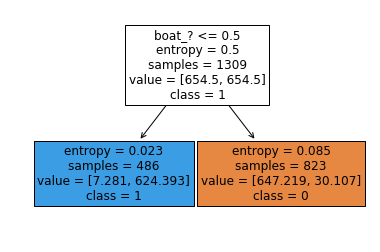

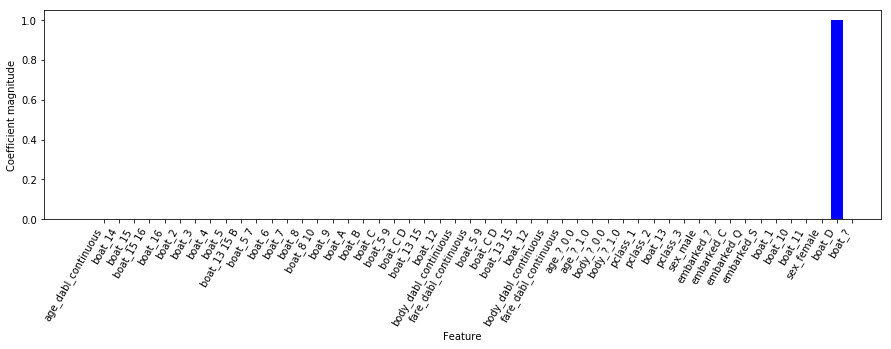

In [6]:
from dabl.explain import explain
explain(ec)

In [4]:
coef

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

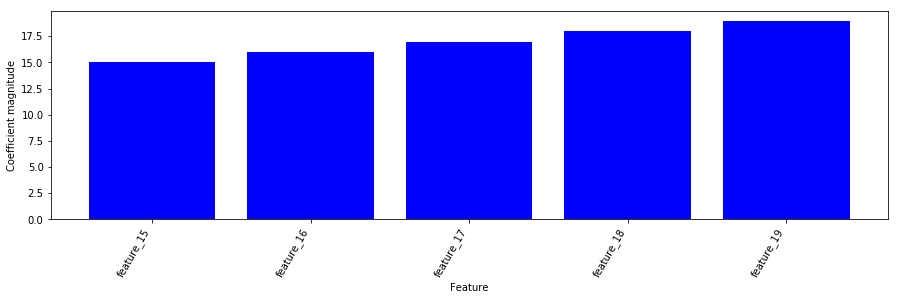

In [6]:
from dabl.explain import plot_coefficients
coef = np.arange(20)
names = ["feature_{}".format(i) for i in range(20)]
plot_coefficients(coef, names, n_top_features=5)

In [25]:
from dabl.preprocessing import EasyPreprocessor, clean
ep = EasyPreprocessor()

In [26]:
X = clean(X)
ep.fit(X, y)

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['fare_?']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['fare_?']
  near_constant.index[near_constant].tolist()))


EasyPreprocessor(scale=True, types=None, verbose=0)

In [35]:
X.columns[X.columns.map(cols)]  ## WTF Ask joris!!

Index(['age_?', 'body_?', 'pclass', 'sex', 'embarked', 'boat'], dtype='object')

In [ ]:
# from sklearn.datasets import fetch_openml
# adult = fetch_openml("adult-census")
# adult_df = pd.DataFrame(adult.data, columns=adult.feature_names)

In [ ]:
y = adult.income
X = adult.drop("income", axis=1)

In [ ]:
X.columns

In [ ]:
X.shape

In [ ]:
from fml.preprocessing import detect_types_dataframe
detect_types_dataframe(X)

In [ ]:
n_values = X.apply(lambda x: x.nunique())
n_values

In [ ]:
fc = FriendlyClassifier().fit(X, y)

In [ ]:
from fml.preprocessing import detect_types_dataframe

In [ ]:
asdf = detect_types_dataframe(X, verbose=10)

In [ ]:
asdf.categorical

In [ ]:
"".join("{}: {} ".format(a, b) for a, b in asdf.categorical.items())

In [ ]:
X_cleanish.shape

In [ ]:
fp = FriendlyPreprocessor()
fp.fit_transform(X_cleanish).shape

In [ ]:
%%prun -s cumulative -l 100 -D test.prof
X_cleanish = safe_cleanup(X, onehot=True)
fc = FriendlyClassifier().fit(X_cleanish, y)

In [19]:
X.index = np.zeros(len(X))

In [22]:
X.index.is_unique

False

In [27]:
X = pd.DataFrame([[0, 1]], columns=['a', 'a'])
X

,a,a
0,0,1
